# Задача 1. Линейная регрессия, метод градиентного спуска

- Самостоятельно реализовать функцию **gradient_descent(X, y)**, которая по заданной обучающей выборке обучает модель линейной регрессии, оптимизируя функционал **методом градиентного спуска (Batch Gradient Descent, GD)** и возвращая вектор весов **w**. В качестве функционала можно выбрать, например, функцию ошибок **MSE** + $L_2$-регуляризатор. Использовать матрично-векторные операции для вычисления градиента.
- Найти данные, на которых интересно будет решать задачу регрессии. Зависимость целевого признака от нецелевых должна быть не слишком сложной, чтобы обученная линейная модель смогла показать приемлимый результат. В крайнем случае взять данные для предсказания стоимости машин [тут](https://github.com/rustam-azimov/ml-course-itmo/tree/main/data/car_price) (целевой признак для предсказания --- **price**).
- Считать данные, выполнить первичный анализ данных, при необходимости произвести чистку данных (**Data Cleaning**).
- Выполнить разведочный анализ (**EDA**), использовать визуализацию, сделать выводы, которые могут быть полезны при дальнейшем решении задачи регрессии.
- При необходимости выполнить полезные преобразования данных (например, трансформировать категариальные признаки в количественные), убрать ненужные признаки, создать новые (**Feature Engineering**).
- Случайным образом разбить данные на **обучающую** и **тестовую** выборки, используя методы существующих библиотек.
- При обучении моделей использовать **масштабирование данных**.
- Обучить модель на обучающей выборке, используя функцию **gradient_descent(X, y)**. Оценить качество модели на обучающей и тестовой выборках, используя **MSE**, **RMSE** и $R^2$.
- Обучить модель, используя существующую библиотеку. Например, в **sklearn** для $L_2$-регуляризатора можно использовать **Ridge**. Сравнить качество с Вашей реализацией.
- Повторить тоже самое, но используя **кросс-валидацию**.
- Создать таблицу, со строками (mse-train, mse-test, rmse-train, rmse-test, r2-train, r2-test) и столбцами (Fold1, Fold2, ..., Foldk, E, STD), где k --- количество фолдов в кросс-валидации, **E** --- мат. ожидание и **STD** --- стандартное отклонение. Сделать выводы.
- (**+2 балла**) Перед обучением моделей подобрать наилучшее количество (и само подмножество) признаков, например используя **Recursive Feature Elimination (RFE)** из **sklearn**.
- (**+1 балл**) Во все ваши реализации добавить возможность настройки нужных **гиперпараметров**, а в процессе обучения **всех** моделей осуществить подбор оптимальных значений этих гиперпараметров.
- (**+1 балл**) Также самостоятельно реализовать **метод стохастического градиентного спуска (Stochastic Gradient Descent, SGD)**, обучить модели и добавить их во все сравнения.
- (**+1 балл**) Также самостоятельно реализовать **метод мини-пакетного градиентного спуска (Mini Batch Gradient Descent)**, обучить модели и добавить их во все сравнения.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pathlib

# устанавливаем точность чисел с плавающей точкой
%precision % .4f

import warnings

warnings.filterwarnings('ignore')  # отключаем предупреждения
dataset_path = pathlib.Path().resolve().parent / "data" / "car_price" / "car_price.csv"

# Датасет
Будет использоваться [Датасет](https://github.com/rustam-azimov/ml-course-itmo/blob/main/data/car_price/car_price.csv). Данный набор содержит инорфмацию о ценах на машины

## Признаки
car_ID - id машины\
symboling - уровень страхового риска (-2 .. 3)\
carName - название машины\
fueltype - тип топлива(бензин или газ)\
aspiration - тип двигателя (std - атмосферный или turbo - турбированный)\
doornumber - количество дверей\
cadbody - тип кузова\
drivewheel - привод машны (rdw - задний, fwd - передний, 4wd - полный)\
enginelocation - где находится двигатель\
wheelbase - расстояние между передней и задней осями\
carlength - длина машины\
carwidth - ширина машины\
carheight - высота машины\
curbweight - вес машины\
enginetype - тип двигателя\
cylindernumber - количество цилиндров\
enginesize - размер двигателя\
fuelsystem - тип системы впрыска топлива\
boreratio - соотношение диаметра отверстия цилиндра и длины хода поршня\
stroke - нет данных\
compressionratio - соотношение объема цилиндра с поршнем в нижнем положении\
horsepower - количетсов лошадинных сил\
peakrpm - обороты двигателя в секунду в пике\
citympg - количество милей на галлон в городских условиях\
highwaympg - количество милей на галлон на шоссе\
price - цена

In [2]:
df = pd.read_csv(dataset_path)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


df.info()

Нулевых значений нет

## Data cleaning

Уберем лишние признаки, которые не влияют на цену машины

In [3]:
df.drop(columns=["car_ID", "CarName"], inplace=True)

Так же преобразуем категориальные признаки к числовым.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    int64  
 1   fueltype          205 non-null    object 
 2   aspiration        205 non-null    object 
 3   doornumber        205 non-null    object 
 4   carbody           205 non-null    object 
 5   drivewheel        205 non-null    object 
 6   enginelocation    205 non-null    object 
 7   wheelbase         205 non-null    float64
 8   carlength         205 non-null    float64
 9   carwidth          205 non-null    float64
 10  carheight         205 non-null    float64
 11  curbweight        205 non-null    int64  
 12  enginetype        205 non-null    object 
 13  cylindernumber    205 non-null    object 
 14  enginesize        205 non-null    int64  
 15  fuelsystem        205 non-null    object 
 16  boreratio         205 non-null    float64
 1

In [5]:
dicts = {
    "fueltype": {"gas": 0, "diesel": 1},
    "aspiration": {"std": 0, "turbo": 1},
    "doornumber": {"two": 0, "four": 1},
    "carbody": {"sedan": 0, "hatchback": 1, "wagon": 2, "hardtop": 3, "convertible": 4},
    "drivewheel": {"fwd": 0, "rwd": 1, "4wd": 2},
    "enginelocation": {"front": 0, "rear": 1},
    "enginetype": {"ohc": 0, "ohcf": 1, "ohcv": 2, "dohc": 3, "l": 4, "rotor": 5, "dohcv": 6},
    "cylindernumber": {"two": 0, "three": 1, "four": 2, "five": 3, "six": 4, "eight": 5, "twelve": 6},
    "fuelsystem": {"mpfi": 0, "2bbl": 1, "idi": 2, "1bbl": 3, "spdi": 4, "4bbl": 5, "mfi": 6, "spfi": 7}
}

for d in dicts:
    keys = list(dicts[d].keys())
    values = list(dicts[d].values())
    df[d].replace(keys, values, inplace=True)

In [6]:
df.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,0,0,0,4,1,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,0,0,0,4,1,0,88.6,168.8,64.1,...,130,0,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,0,0,0,1,1,0,94.5,171.2,65.5,...,152,0,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,0,0,1,0,0,0,99.8,176.6,66.2,...,109,0,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,0,0,1,0,2,0,99.4,176.6,66.4,...,136,0,3.19,3.40,8.0,115,5500,18,22,17450.0


### Посторим корреляционную матрицу

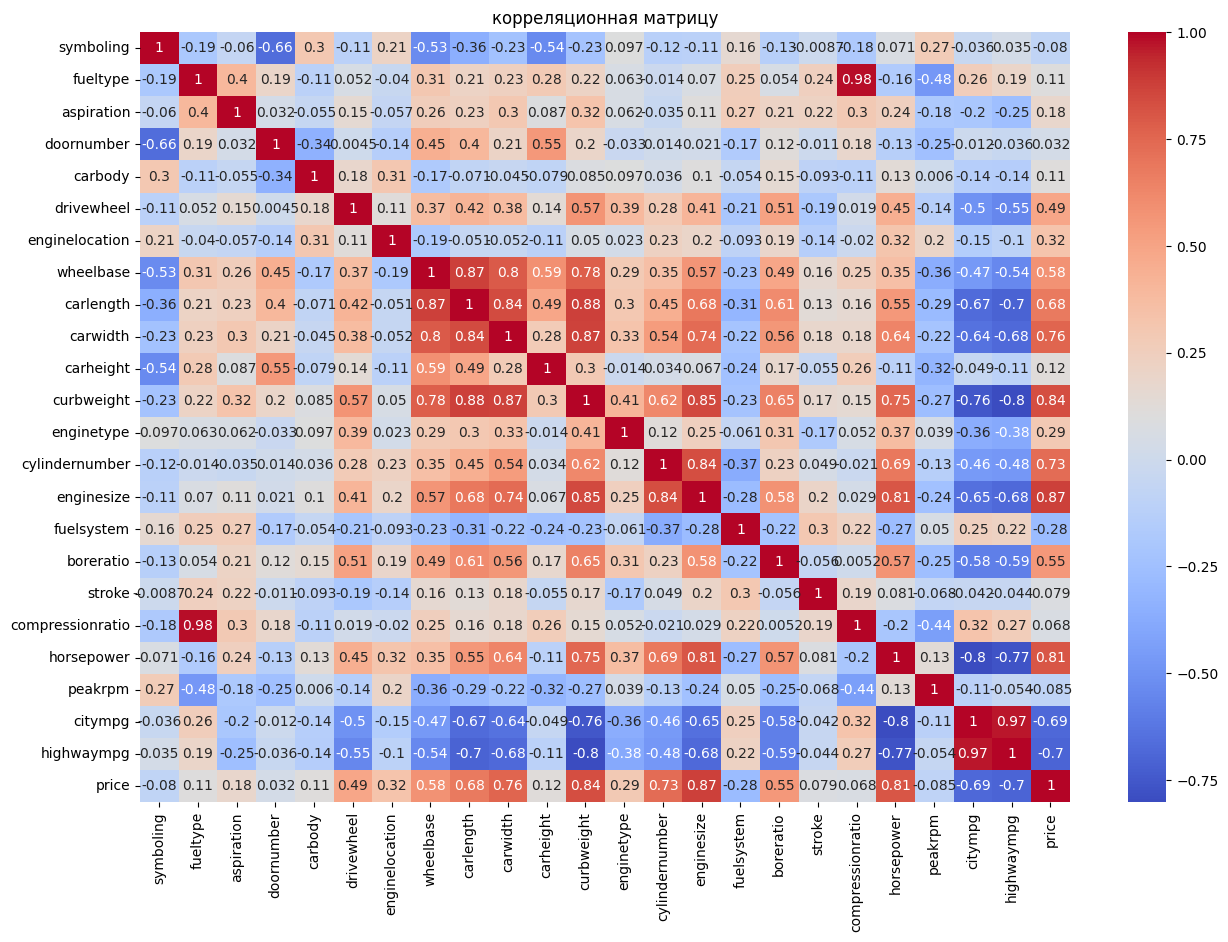

In [7]:
df_corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(df_corr, annot=True, cmap="coolwarm")
plt.title("корреляционная матрицу")
plt.show()

In [8]:
df.drop(columns=["carlength", "carwidth", "curbweight", "enginesize", "cylindernumber", "horsepower", "citympg", "highwaympg"], inplace=True)

# RFE

In [9]:
from sklearn.feature_selection import RFECV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge

X= df.drop(columns="price")
y = df["price"]

rfe = RFECV(
    estimator=Pipeline([("scaler", StandardScaler()), ("regressor", Ridge())]),
    importance_getter=lambda x: x.named_steps["regressor"].coef_
).fit(X, y)

print(f"Количество признаков: {rfe.n_features_}")
print(f"{list(X.columns[rfe.support_])}")

Количество признаков: 4
['drivewheel', 'enginelocation', 'wheelbase', 'carheight']


Избавимся от остальных признаков

In [10]:
columns_to_drop = list(X.columns)
for feat in list(X.columns[rfe.support_]):
    columns_to_drop.remove(feat)

X.drop(columns=columns_to_drop, inplace=True)

# Градиентный спуск

In [11]:
import abc
from sklearn.base import RegressorMixin
from sklearn.linear_model._base import LinearModel

class LinRegression(RegressorMixin, LinearModel, abc.ABC):
    def __init__(self, alpha=1, max_iter=1000, tol=1e-5):
        self.alpha = alpha
        self.max_iter = max_iter
        self.tol = tol

    def get_batch(self, X, y):
        return X, y

    def fit(self, X, y):
        X = np.c_[X, np.ones(X.shape[0])]
        coef = np.ones(X.shape[1])
        grad = np.inf
        
        i = 0
        while i < self.max_iter and np.linalg.norm(grad) > self.tol:
            X_subset, y_subset = self.get_batch(X, y)
            pred = X_subset @ coef
            grad = (2 / X_subset.shape[0]) * X_subset.T @ (pred - y_subset) + 2 * self.alpha * np.pad(coef[:-1], (0, 1))
            i += 1
            coef -= grad / i

        self.coef_ = coef[:-1]
        self.intercept_ = coef[-1]

        return self

In [25]:
from sklearn.utils.validation import check_random_state
import math

class MBGDLinRegression(LinRegression):
    def __init__(self, alpha=1, batch_size=0.1, max_iter=1000, tol=1e-5, random_state=42):
        super().__init__(alpha, max_iter=max_iter, tol=tol)
        self.batch_size = batch_size
        self.random_state = random_state

    def get_batch(self, X, y):
        self.random_state_ = check_random_state(self.random_state)
        size = math.ceil(len(X) * self.batch_size)
        idx = self.random_state_.randint(len(X), size=size)
        return X[idx, :], y.iloc[idx]

In [26]:
class SGDLinRegressor(LinRegression):
    def  __init__(self, alpha=1, max_iter=1000, tol=1e-5, random_state=42):
        super().__init__(alpha, max_iter=max_iter, tol=tol)
        self.random_state = random_state

    def get_batch(self, X, y):
        self.random_state_ = check_random_state(self.random_state)
        idx = self.random_state_.randint(len(X), size=1)
        return X[idx, :], y[idx]

# Обучение

## Без кроссвалидации

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

def train(regressor, name):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.6, random_state=42)
    model = Pipeline([("scaler", StandardScaler()), ("regressor", regressor)])
    model.fit(X_train, y_train)

    pred = model.predict(X_train)
    mse_train = mean_squared_error(y_train, pred)
    rmse_train = mean_squared_error(y_train, pred, squared=False)
    r2_train = r2_score(y_train, pred)

    pred = model.predict(X_test)
    mse_test = mean_squared_error(y_test, pred)
    rmse_test = mean_squared_error(y_test, pred, squared=False)
    r2_test = r2_score(y_test, pred)

    return [name, mse_train, mse_test, rmse_train, rmse_test, r2_train, r2_test]

pd.DataFrame(
    [
        train(Ridge(), "Ridge"),
        train(LinRegression(), "Самописный градиентный спуск"),
        train(MBGDLinRegression(), "Самописный MBGD градиентный спуск"),
        train(SGDLinRegressor(), "Самописный SGD градиентный спуск")
    ],
    columns=["Regressor", "MSE train", "MSE test", "RMSE train", "RMSE test", "R2 train", "R2 test"]
)

,Regressor,MSE train,MSE test,RMSE train,RMSE test,R2 train,R2 test
0,Ridge,2.310268e+07,2.312014e+07,4806.525115,4808.341045,0.651405,0.606941
1,Самописный градиентный спуск,3.612715e+07,3.265357e+07,6010.586504,5714.329946,0.454880,0.444866
2,Самописный MBGD градиентный спуск,5.502916e+07,4.832042e+07,7418.163917,6951.289140,0.169669,0.178518
3,Самописный SGD градиентный спуск,6.685021e+07,6.166986e+07,8176.197707,7853.016206,-0.008698,-0.048432


## С кроссвалидацией и подбором гиперпараметров

In [34]:
from sklearn.model_selection import GridSearchCV

def train_gscv(regressor, name, param_grid):
    model = Pipeline([("scaler", StandardScaler()), ("regressor", regressor)])
    param_grid = {f"regressor__{name}": val for name, val in param_grid.items()}
    grid_search = GridSearchCV(
        model,
        param_grid,
        scoring=["neg_mean_squared_error", "neg_root_mean_squared_error", "r2"],
        refit="neg_mean_squared_error",
        return_train_score=True
    )
    grid_search.fit(X, y)

    print(name)
    print(
        "Лучшие гиперпараметры:",
        {name: val for name, val in grid_search.best_params_.items()}
    )

    result = pd.DataFrame(grid_search.cv_results_).iloc[grid_search.best_index_]
    data = []
    indexies = []
    column_names = []
    for i in range(1, 6):
        column_names.append(f"Fold {i}")
    column_names.append("Mean")
    column_names.append("STD")

    for score_function, name in [
        ("neg_mean_squared_error", "MSE"),
        ("neg_root_mean_squared_error", "RMSE"),
        ("r2", "R2")
    ]:
        for run_type in ["train", "test"]:
            row = []
            for i in range(5):
                row.append(result[f"split{i}_{run_type}_{score_function}"])
            row.append(result[f"mean_{run_type}_{score_function}"])
            row.append(result[f"std_{run_type}_{score_function}"])
            data.append(row)
            indexies.append(f"{name} ({run_type})")

    return pd.DataFrame(
        data=data,
        index=indexies,
        columns=column_names
    )

In [35]:
train_gscv(Ridge(), "Ridge", {"alpha": [i * 10 for i in range(1, 10)]})

Ridge
Лучшие гиперпараметры: {'regressor__alpha': 10}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),-2.073474e+07,-1.920385e+07,-2.215995e+07,-2.432587e+07,-2.549292e+07,-2.238347e+07,2.294334e+06
MSE (test),-3.518390e+07,-5.517819e+07,-3.131560e+07,-6.860374e+07,-1.429057e+07,-4.091440e+07,1.899452e+07
RMSE (train),-4.553541e+03,-4.382220e+03,-4.707435e+03,-4.932126e+03,-5.049052e+03,-4.724875e+03,2.429466e+02
RMSE (test),-5.931602e+03,-7.428202e+03,-5.596034e+03,-8.282737e+03,-3.780288e+03,-6.203773e+03,1.558077e+03
R2 (train),6.609990e-01,5.630154e-01,6.990705e-01,6.139404e-01,6.594412e-01,6.392933e-01,4.671502e-02
R2 (test),5.170106e-01,5.731905e-01,-6.814466e-01,-7.491314e-02,2.058368e-01,1.079356e-01,4.582460e-01


In [36]:
train_gscv(
    LinRegression(), "Самописный градиентный спуск", 
    {
        "alpha": [0.001, 0.01, 0.1, 1],
        "max_iter": [9000, 10000, 11000],
        "tol": [1e-5, 1e-6, 1e-7]
    }
)

Самописный градиентный спуск
Лучшие гиперпараметры: {'regressor__alpha': 0.01, 'regressor__max_iter': 9000, 'regressor__tol': 1e-05}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),-2.039899e+07,-1.901157e+07,-2.181135e+07,-2.402496e+07,-2.507895e+07,-2.206516e+07,2.240029e+06
MSE (test),-3.497323e+07,-4.987571e+07,-3.452287e+07,-6.959532e+07,-1.611684e+07,-4.101679e+07,1.785450e+07
RMSE (train),-4.516524e+03,-4.360226e+03,-4.670262e+03,-4.901526e+03,-5.007888e+03,-4.691285e+03,2.387560e+02
RMSE (test),-5.913817e+03,-7.062273e+03,-5.875616e+03,-8.342381e+03,-4.014578e+03,-6.241733e+03,1.434420e+03
R2 (train),6.664883e-01,5.673907e-01,7.038044e-01,6.187159e-01,6.649715e-01,6.442742e-01,4.696803e-02
R2 (test),5.199027e-01,6.142058e-01,-8.536565e-01,-9.044963e-02,1.043469e-01,5.886984e-02,5.249796e-01


In [39]:
train_gscv(
    MBGDLinRegression(), "Самописный MBGD градиентный спуск",
    {
        "alpha": [0.001, 0.01, 0.1, 1],
        "max_iter": [9000, 10000, 11000],
        "tol": [1e-5, 1e-6, 1e-7]
    }
)

Самописный MBGD градиентный спуск
Лучшие гиперпараметры: {'regressor__alpha': 1, 'regressor__max_iter': 11000, 'regressor__tol': 1e-05}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),-4.703575e+07,-2.715015e+07,-3.301041e+07,-3.352199e+07,-4.647597e+07,-3.743885e+07,7.931963e+06
MSE (test),-6.791188e+07,-1.121928e+08,-4.058847e+07,-8.463178e+07,-1.664451e+07,-6.439388e+07,3.332681e+07
RMSE (train),-6.858261e+03,-5.210581e+03,-5.745469e+03,-5.789818e+03,-6.817329e+03,-6.084291e+03,6.482683e+02
RMSE (test),-8.240867e+03,-1.059211e+04,-6.370908e+03,-9.199553e+03,-4.079769e+03,-7.696641e+03,2.270594e+03
R2 (train),2.309927e-01,3.821971e-01,5.517224e-01,4.679949e-01,3.791297e-01,4.024073e-01,1.067052e-01
R2 (test),6.773511e-02,1.321762e-01,-1.179341e+00,-3.260474e-01,7.502240e-02,-2.460908e-01,4.943753e-01


In [44]:
train_gscv(
    SGDLinRegressor(), "Самописный SGD градиентный спуск",
    {
        "alpha": [0.001, 0.01, 0.1, 1],
        "max_iter": [9000, 10000, 11000],
        "tol": [1e-5, 1e-6, 1e-7]
    }
)

Самописный SGD градиентный спуск
Лучшие гиперпараметры: {'regressor__alpha': 0.001, 'regressor__max_iter': 9000, 'regressor__tol': 1e-05}


,Fold 1,Fold 2,Fold 3,Fold 4,Fold 5,Mean,STD
MSE (train),-2.439297e+08,-1.935831e+08,NaN,-1.883890e+08,-1.953860e+08,NaN,NaN
MSE (test),-2.600949e+08,-4.188450e+08,NaN,-2.275523e+08,-7.466771e+07,NaN,NaN
RMSE (train),-1.561825e+04,-1.391341e+04,NaN,-1.372549e+04,-1.397806e+04,NaN,NaN
RMSE (test),-1.612746e+04,-2.046570e+04,NaN,-1.508484e+04,-8.641048e+03,NaN,NaN
R2 (train),-2.988110e+00,-3.404992e+00,NaN,-1.989797e+00,-1.610153e+00,NaN,NaN
R2 (test),-2.570470e+00,-2.239813e+00,NaN,-2.565388e+00,-3.149473e+00,NaN,NaN


# Вывод

1. Модели, внедренные без применения кросс-валидации и подбора гиперпараметров, продемонстрировали низкое качество
2. Модели, которые были реализованы с использованием кросс-валидации и подбором гиперпараметров, приблизили показатели к модели Ridge из библиотеки scikit-learn
3. Временные характеристики всех моделей оказались примерно одинаковыми, возможно, из-за небольшого размера датасета. Однако стоит отметить, что время выполнения модели Ridge было заметно меньше
4. Метод стохастического градиентного спуска продемонстрировал худшие результаты по всем метрикам по сравнению с другими методами